In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
data = pd.read_csv('Position_Salaries.csv')

In [4]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


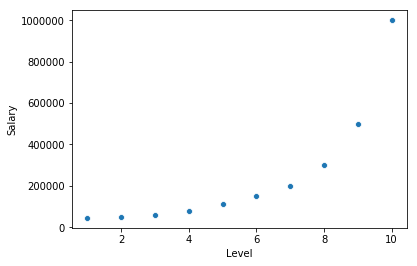

In [7]:
sns.scatterplot(data=data, x='Level', y='Salary')

In [9]:
data[['Level','Salary']].corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [15]:
from statsmodels import api

C:\Users\Olabode\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [23]:
mod= api.OLS(data['Salary'], data['Level']).fit()

In [29]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     27.88
Date:                Sat, 16 Feb 2019   Prob (F-statistic):           0.000507
Time:                        19:52:53   Log-Likelihood:                -135.56
No. Observations:                  10   AIC:                             273.1
Df Residuals:                       9   BIC:                             273.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Level       5.297e+04      1e+04      5.281      0.0

C:\Users\Olabode\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [31]:
X = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

In [40]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [85]:
#Get polynomial features

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=6)

In [86]:
X_poly = poly.fit_transform(X)

In [87]:
X_poly

array([[1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.00000e+00, 4.00000e+00, 8.00000e+00, 1.60000e+01,
        3.20000e+01, 6.40000e+01],
       [1.00000e+00, 3.00000e+00, 9.00000e+00, 2.70000e+01, 8.10000e+01,
        2.43000e+02, 7.29000e+02],
       [1.00000e+00, 4.00000e+00, 1.60000e+01, 6.40000e+01, 2.56000e+02,
        1.02400e+03, 4.09600e+03],
       [1.00000e+00, 5.00000e+00, 2.50000e+01, 1.25000e+02, 6.25000e+02,
        3.12500e+03, 1.56250e+04],
       [1.00000e+00, 6.00000e+00, 3.60000e+01, 2.16000e+02, 1.29600e+03,
        7.77600e+03, 4.66560e+04],
       [1.00000e+00, 7.00000e+00, 4.90000e+01, 3.43000e+02, 2.40100e+03,
        1.68070e+04, 1.17649e+05],
       [1.00000e+00, 8.00000e+00, 6.40000e+01, 5.12000e+02, 4.09600e+03,
        3.27680e+04, 2.62144e+05],
       [1.00000e+00, 9.00000e+00, 8.10000e+01, 7.29000e+02, 6.56100e+03,
        5.90490e+04, 5.31441e+05],
       [1.00000e+00, 1.00000

In [88]:
mod2= api.OLS(y, X_poly).fit()

In [89]:
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     9896.
Date:                Sat, 16 Feb 2019   Prob (F-statistic):           1.57e-06
Time:                        20:14:28   Log-Likelihood:                -90.292
No. Observations:                  10   AIC:                             194.6
Df Residuals:                       3   BIC:                             196.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.217e+04   4.68e+04      1.757      0.1

C:\Users\Olabode\Anaconda\lib\site-packages\scipy\stats\stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


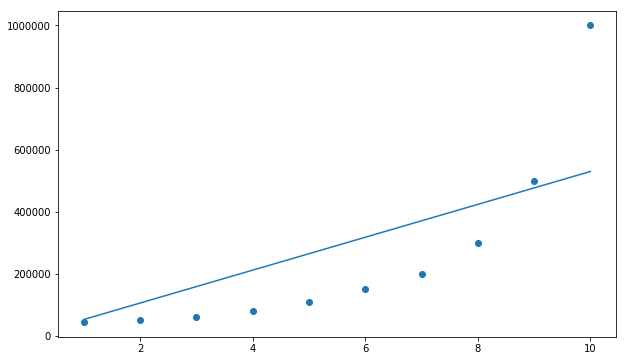

In [90]:
plt.figure(figsize= (10,6))
plt.scatter(X,y)
plt.plot(X, mod.predict(X))

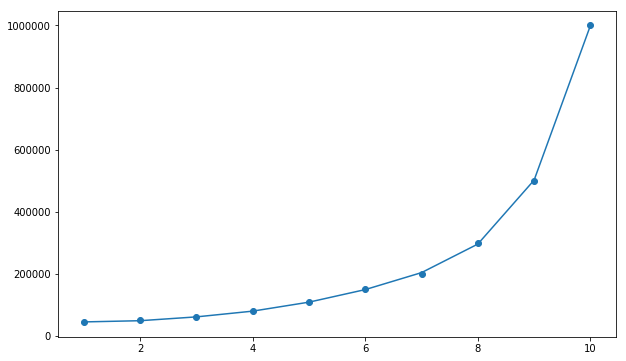

In [91]:
plt.figure(figsize= (10,6))
plt.scatter(X,y)
plt.plot(X, mod2.predict(X_poly))

In [99]:
mod.predict(6.5)

array([344331.16883117])

In [100]:
mod2.predict(poly.fit_transform(6.5))

array([174192.81930455])